# Fourier Transform

1. Load a grayscale image and apply the 2D Discrete Fourier Transform (DFT) to it. Visualize
the original image and its frequency spectrum (magnitude). Submit the images, and
explanation.

2. Implement a low-pass filter in the frequency domain to remove high-frequency noise from
an image. Compare the filtered image with the original image. Submit images, and analysis
of the results.

3. Implement a high-pass filter to enhance the edges in an image. Visualize the filtered image
and discuss the effects observed. Submit images, and explanation.

4. Implement an image compression technique using Fourier Transform by selectively keeping
only a certain percentage of the Fourier coefficients. Evaluate the quality of the
reconstructed image as you vary the percentage of coefficients used. Submit the images,
and your observations on image quality and compression ratio.

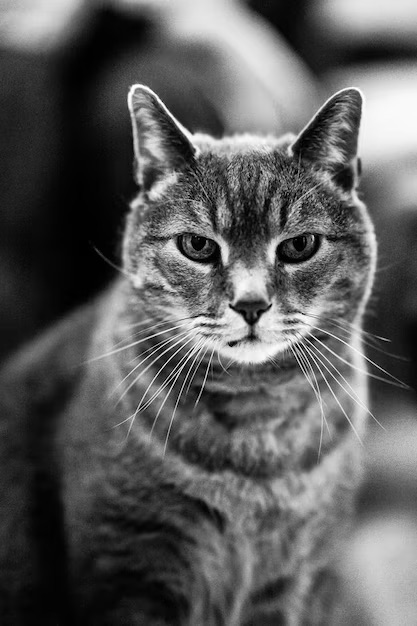

In [1]:
from IPython.display import Image, display # type: ignore

# Display the image
display(Image(filename='cat.jpeg'))

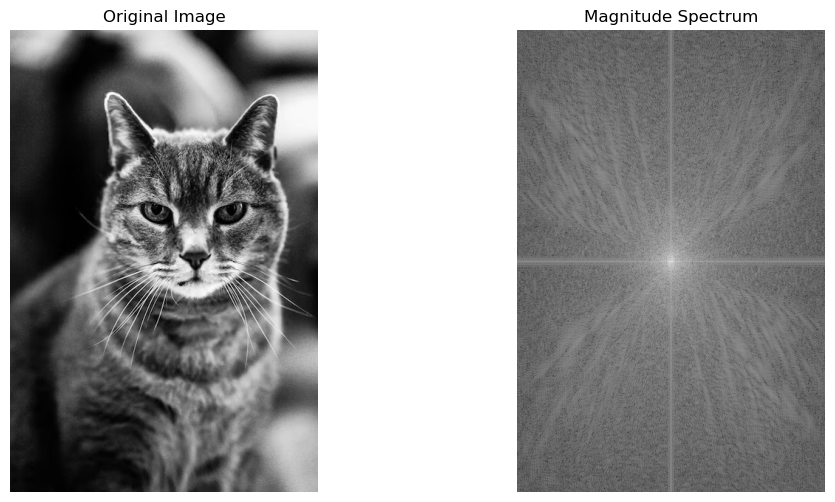

In [3]:

import cv2
import cv2
import numpy as np
import numpy as np

import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('cat.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply 2D Discrete Fourier Transform
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Compute the magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Plot the original image and its magnitude spectrum
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.show()

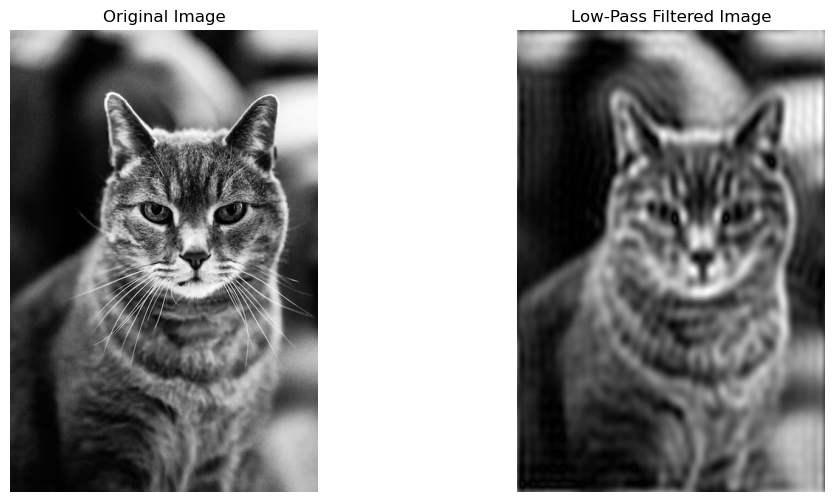

In [5]:
# Create a mask with a low-pass filter
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2

# Create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
r = 30  # Radius of the low-pass filter
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

# Apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# Plot the original and filtered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title('Low-Pass Filtered Image')
plt.axis('off')

plt.show()

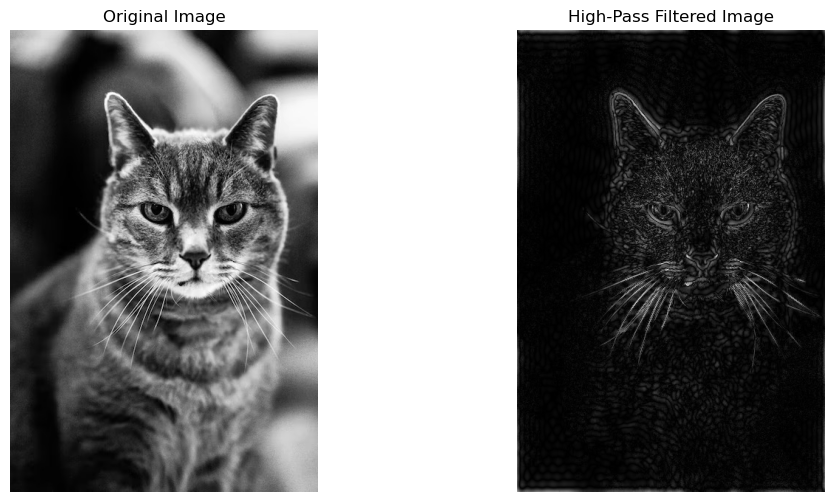

In [6]:
# Create a mask with a high-pass filter
mask = np.ones((rows, cols, 2), np.uint8)
r = 30  # Radius of the low-pass filter to be subtracted
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

# Apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# Plot the original and filtered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title('High-Pass Filtered Image')
plt.axis('off')

plt.show()

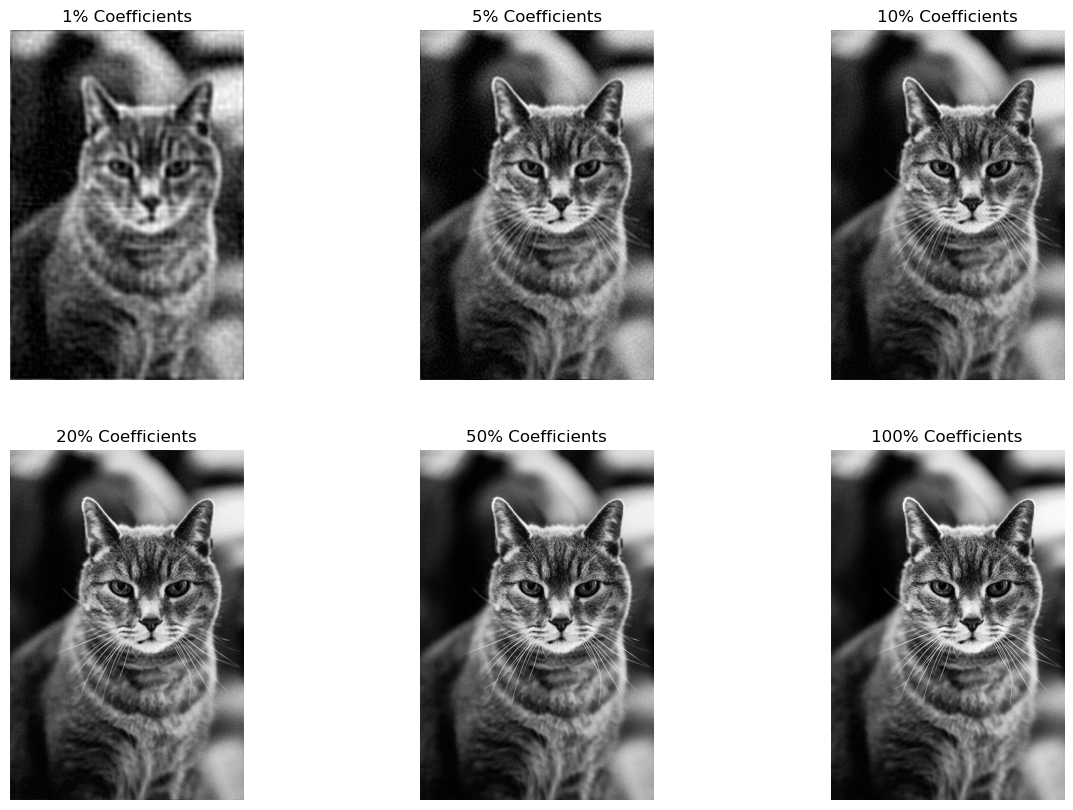

In [7]:
def compress_image(image, percentage):
    # Compute the 2D Discrete Fourier Transform
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    # Compute the magnitude spectrum
    magnitude_spectrum = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
    
    # Flatten the magnitude spectrum and sort by magnitude
    flattened_magnitude = magnitude_spectrum.flatten()
    sorted_indices = np.argsort(flattened_magnitude)[::-1]
    
    # Determine the number of coefficients to keep
    total_coefficients = len(flattened_magnitude)
    num_coefficients_to_keep = int(total_coefficients * percentage / 100)
    
    # Create a mask to keep only the largest coefficients
    mask = np.zeros_like(flattened_magnitude, dtype=np.uint8)
    mask[sorted_indices[:num_coefficients_to_keep]] = 1
    mask = mask.reshape(magnitude_spectrum.shape)
    
    # Apply the mask to the DFT coefficients
    dft_shift[:, :, 0] *= mask
    dft_shift[:, :, 1] *= mask
    
    # Perform the inverse DFT to reconstruct the image
    f_ishift = np.fft.ifftshift(dft_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    
    return img_back

# Evaluate the quality of the reconstructed image for different percentages of coefficients
percentages = [1, 5, 10, 20, 50, 100]
plt.figure(figsize=(15, 10))

for i, percentage in enumerate(percentages):
    compressed_image = compress_image(image, percentage)
    
    plt.subplot(2, 3, i + 1)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'{percentage}% Coefficients')
    plt.axis('off')

plt.show()